In [578]:
from lxml import etree
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tiktoken
# How to use tiktoken: https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb

encoding = tiktoken.encoding_for_model("gpt-3.5-turbo") # Encoding 'cl100k_base'

In [579]:
with open('data/udhr/udhr_kor.xml') as f:
        tree = etree.parse(f)

tree.getroot().get('n')

'Korean'

In [580]:
language = ''
if language == 'deu_1996':
        language = 'deu'
if language == 'ell_monotonic':
    language = 'ell'
if language == 'pes_1':
    language = 'pes'
if language == 'cmn_hans':
    language = 'cmn_simp'
if language == 'cmn_hant':
    language = 'cmn_trad'
if language == 'azj_latn':
    language = 'azj'

In [643]:
from pathlib import Path

udhr_dir = Path('data/udhr')
token_dfs = {}
language_names = {}

for filename in sorted(udhr_dir.glob('*.xml')):
    language = filename.stem[5:]


    print(language, end=' ')

    with open(filename) as f:
        tree = etree.parse(f)

    language_names[language] = tree.getroot().get('n')

    text = '\n'.join([tree.find('{http://www.unicode.org/udhr}title').text] + 
        [p.text for p in tree.find('{http://www.unicode.org/udhr}preamble').findall('.//{http://www.unicode.org/udhr}para')] +
        [p.text for article in tree.findall('{http://www.unicode.org/udhr}article')
                for p in article.findall('.//{http://www.unicode.org/udhr}para')])

    token_codes = encoding.encode(text)
    df = pd.DataFrame({'decoded': [encoding.decode([token]) for token in token_codes]})
    df['length'] = df['decoded'].str.strip().str.len()
    df['byte_length'] = df['decoded'].apply(lambda d: len(d.strip().encode('utf-8')))
    token_dfs[language] = df

afr als arb azj_latn ben bul cat ceb ces cmn_hans cmn_hant cos cym dan deu_1996 ell_monotonic eng epo est eus fao fin fra fri fur gle glg hat_kreyol heb hin hrv hsb hun hye ina ind isl ita jav jpn kaz kbd khk kir kjh kor lad lat lav lin lit ltz mar mkd nav nds nld nno nob pan pap pcm pes_1 pol por_BR por_PT quc roh ron_2006 rus sco slk slv spa src srp_cyrl srp_latn swe swh tam tel tgk tgl tha tur uig_latn ukr urd uzn_cyrl vie wol xho zul 

In [678]:
lang = 'pol'
token_dfs[lang][token_dfs[lang]['byte_length'] > 3]['decoded'].apply(lambda s: f"|{s}|").value_counts()[:25]

| praw|      60
|owie|       37
|ności|      34
|ania|       33
| jego|      16
|nych|       14
|acji|       12
| jest|      12
|ści|        12
| się|       11
|ńst|        11
|zenia|      11
| równ|      10
|zeń|        10
|staw|       10
| wszyst|     9
|chron|       8
|zyst|        8
| oraz|       8
|ają|         7
| mają|       7
|owanie|      7
|owej|        6
| osob|       6
|nego|        6
Name: decoded, dtype: int64

In [637]:
lang_filter = ['spa', 'uig_latn', 'cat', 'tam', 'ind', 'fin', 'als', 'heb', 'kaz',
       'uzn_cyrl', 'fra', 'azj', 'pes', 'ben', 'gle', 'pan', 'lit', 'kor',
       'srp_cyrl', 'hun', 'est', 'tgl', 'arb', 'vie', 'swe', 'tha',
       'cmn_trad', 'isl', 'tgk', 'kir', 'nob', 'cmn_simp', 'tel', 'bul',
       'mkd', 'dan', 'por_BR', 'srp_latn', 'lad', 'deu', 'nld', 'lav',
       'swh', 'ces', 'lat', 'ell', 'nno', 'khk', 'mar', 'rus', 'ita',
       'ukr', 'por_PT', 'hrv', 'cym', 'urd', 'tur', 'pol', 'eng', 'jpn', 'hin']

lang_filter = ['spa', 'cat', 'tam', 'ind', 'fin', 'als', 'heb', 'kaz',
       'uzn_cyrl', 'fra', 'azj', 'pes', 'ben', 'gle', 'pan', 'lit', 'kor',
       'srp_cyrl', 'hun', 'arb', 'vie', 'swe', 'tha',
       'cmn_trad', 'isl', 'tgk', 'kir', 'cmn_simp', 'tel', 'bul',
       'mkd', 'dan', 'por_BR', 'srp_latn', 'lad', 'deu', 'nld', 'lav',
       'swh', 'ces', 'lat', 'ell', 'nno', 'khk', 'mar', 'rus', 'ita',
       'ukr', 'por_PT', 'hrv', 'cym', 'urd', 'tur', 'pol', 'eng', 'jpn', 'hin']


TokenStatsByLanguage = pd.concat([pd.DataFrame({'lang': lang, 'stat': df.drop_duplicates().byte_length.describe()}) 
           for lang, df in token_dfs.items() if lang in lang_filter or True]).reset_index(
           ).set_index(['lang','index']).unstack()['stat'].sort_values('count', ascending=False)

TokenStatsByLanguage

index,25%,50%,75%,count,max,mean,min,std
lang,,,,,,,,
deu_1996,3.0,3.0,4.00,900.0,13.0,3.652222,0.0,1.607181
ltz,2.0,3.0,4.00,879.0,13.0,3.059158,0.0,1.381180
ita,3.0,3.0,5.00,841.0,11.0,3.741974,0.0,1.715132
fra,3.0,4.0,5.00,839.0,14.0,4.356377,0.0,2.298812
por_PT,3.0,4.0,5.00,826.0,14.0,4.085956,0.0,1.996633
...,...,...,...,...,...,...,...,...
ben,1.0,3.0,3.00,17.0,6.0,2.882353,0.0,1.798692
tam,1.0,2.0,3.00,16.0,6.0,2.250000,0.0,1.843909
tel,1.0,1.0,2.25,12.0,3.0,1.500000,0.0,1.000000


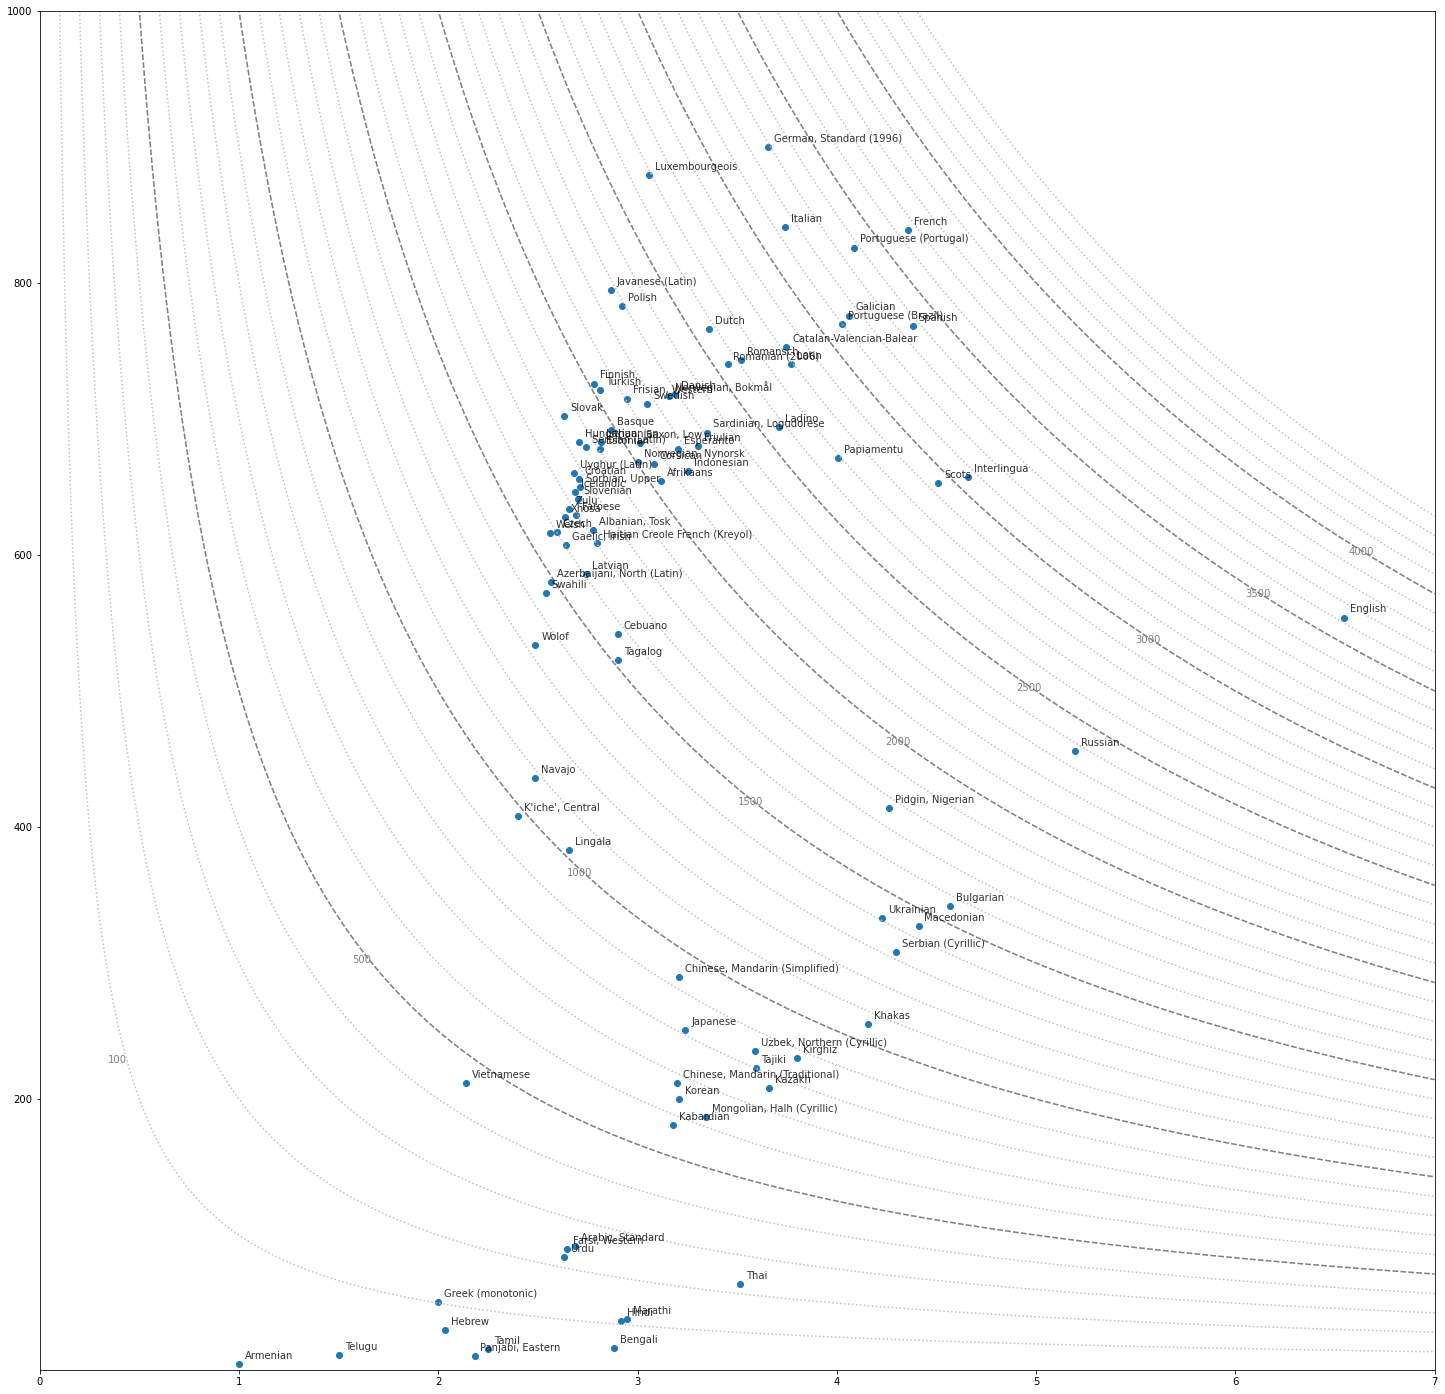

In [642]:
fig, ax = plt.subplots(figsize=(25,25))

ax.scatter(TokenStatsByLanguage['mean'], TokenStatsByLanguage['count'])
ax.set_xlim([0,7])
ax.set_ylim([1, 1000])

for i, code in enumerate(TokenStatsByLanguage.index):
    ax.annotate(language_names[code], (TokenStatsByLanguage['mean'][i] + 0.03, TokenStatsByLanguage['count'][i]+4), alpha=0.8)

x = np.arange(0.001, 8, 0.001)
for param in range(100, 4500, 100):
    ax.plot(x, param/x, color='silver', ls=':')
for param in [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]:
    ax.plot(x, param/x, color='grey', ls='--')


N = np.asarray([100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])
x = (np.sqrt(40000 + N * 240) - 200) / 120
y = N / x

for i in range(len(N)):
    ax.annotate(str(N[i]), (x[i] - 0.1, y[i]), color='grey')




In [584]:
500 / np.arange(0, 8, 0.001)

/var/folders/g7/8vxyyp0n0sz9vxw2bpxdd4jc0000gn/T/ipykernel_33799/1626100401.py:1: RuntimeWarning: divide by zero encountered in true_divide
  500 / np.arange(0, 8, 0.001)


array([           inf, 5.00000000e+05, 2.50000000e+05, ...,
       6.25234463e+01, 6.25156289e+01, 6.25078135e+01])

In [585]:
(lambda df:df[df['byte_length'] > 13])(token_dfs['rus'])

,decoded,length,byte_length
249,обходим,7,14
648,значение,9,17
2339,использов,10,19
3836,который,8,15
4461,результат,10,19
